In [11]:
# !pip install nltk

In [12]:
import pandas as pd

In [13]:
data = pd.read_csv("SPAMTextClassification.csv")
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
print(data.shape)

(5572, 2)


In [15]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


In [38]:
X = data.drop(columns=['Category'])  
y = data['Category']

### Preprocessing

In [58]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

le = LabelEncoder()

y_encoded = le.fit_transform(y)
y_encoded_np = np.array(y_encoded)

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize

tfidf_vectorizer = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
X_tfidf = tfidf_vectorizer.fit_transform(data['Message'])

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_encoded_np, test_size=0.3, random_state=42)

In [61]:
print(type(X_train))
print(type(y_train))

<class 'scipy.sparse._csr.csr_matrix'>
<class 'numpy.ndarray'>


### Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

In [73]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

def score(model):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    plt.plot(*roc_curve(y_test, y_pred)[:2], label='test roc_auc')
    plt.plot([0,1], [0,1], '--', color='black')
    plt.grid()
    plt.legend()

Accuracy: 0.9563397129186603

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1448
           1       0.99      0.68      0.81       224

    accuracy                           0.96      1672
   macro avg       0.97      0.84      0.89      1672
weighted avg       0.96      0.96      0.95      1672


Confusion Matrix:
[[1447    1]
 [  72  152]]
None


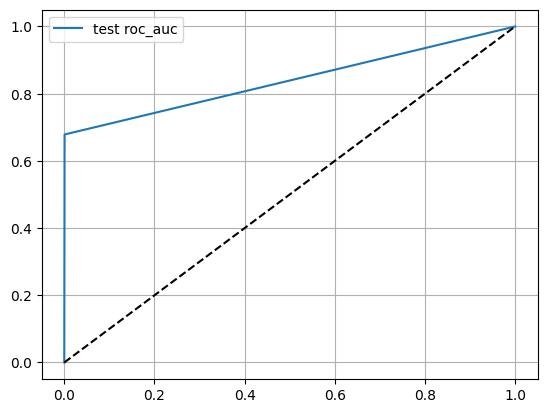

In [74]:
print(score(logreg))

### Naive Bayes

Accuracy: 0.9730861244019139

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1448
           1       1.00      0.80      0.89       224

    accuracy                           0.97      1672
   macro avg       0.98      0.90      0.94      1672
weighted avg       0.97      0.97      0.97      1672


Confusion Matrix:
[[1448    0]
 [  45  179]]
None


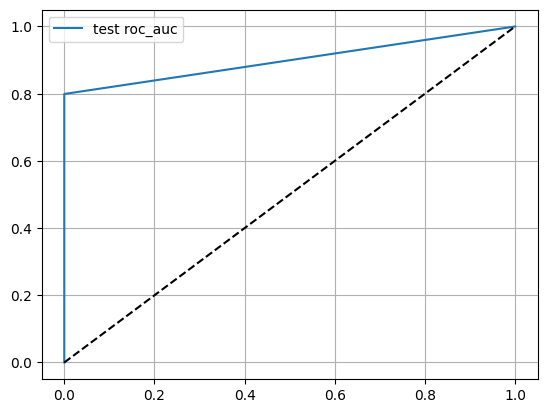

In [75]:
from sklearn.naive_bayes import MultinomialNB

bayes = MultinomialNB()
bayes.fit(X_train, y_train)

print(score(bayes))

### SVM

Accuracy: 0.9772727272727273

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1448
           1       1.00      0.83      0.91       224

    accuracy                           0.98      1672
   macro avg       0.99      0.92      0.95      1672
weighted avg       0.98      0.98      0.98      1672


Confusion Matrix:
[[1448    0]
 [  38  186]]
None


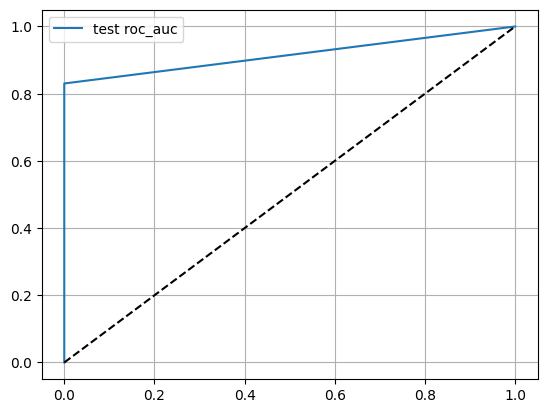

In [76]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)

print(score(svm))